<a href="https://colab.research.google.com/github/Paulin178/Machine-Learning/blob/main/Regression_Logistique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Moyenne de l'AUC sur les ensembles d'entraînement : 0.9549751226327448
Exactitude du modèle : 0.9991223739783884
Matrice de confusion :
 [[218466     12]
 [   180    114]]


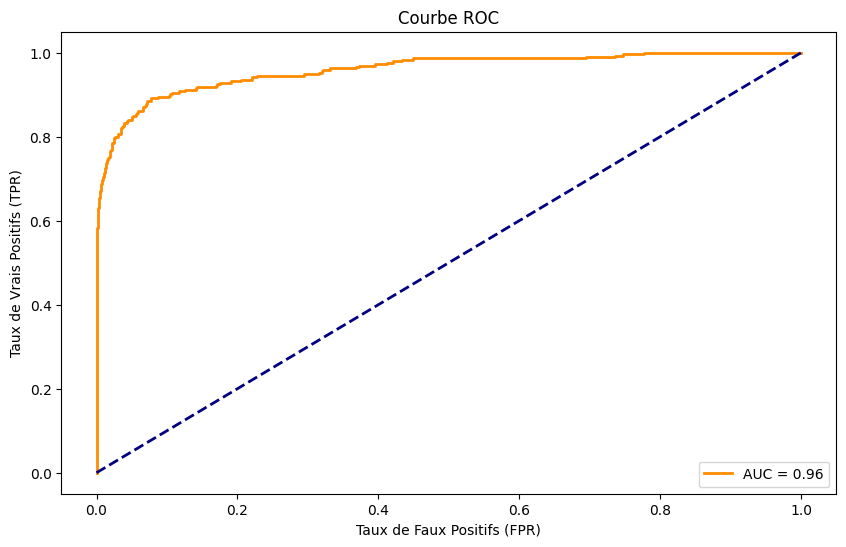

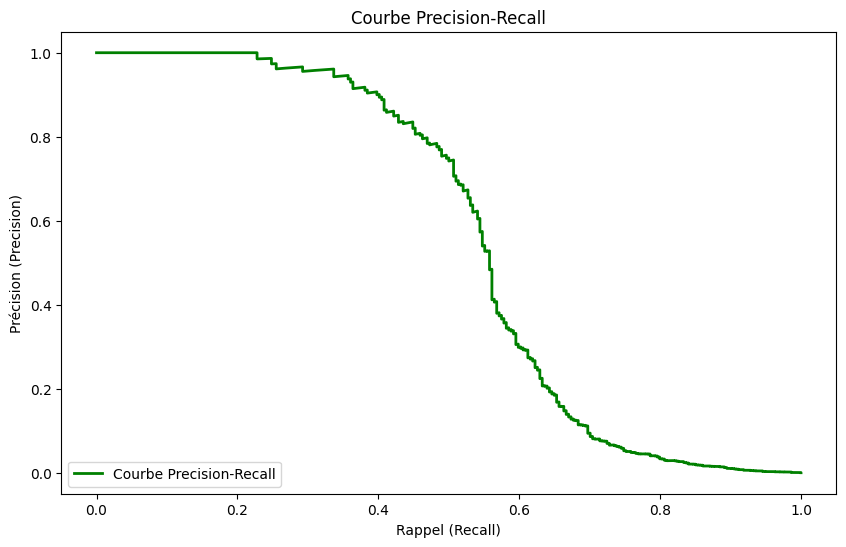

NameError: ignored

In [5]:
# Importation des bibliothèques nécessaires
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

# Chargement des données à partir du fichier CSV
data = pd.read_csv('clear_data.csv')

# Sélection des colonnes pertinentes dans notre fichier CSV
selected_columns = ['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
                    'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud', 'isFraud']

# Cette ligne est utilisée pour sélectionner uniquement les colonnes spécifiées
# dans la liste selected_columns à partir du DataFrame data.
# Cela permet de filtrer le DataFrame initial et de conserver uniquement les colonnes
# jugées pertinentes pour l'analyse ou la modélisation.
data = data[selected_columns]

# La ligne de code data.dropna(inplace=True) est utilisée pour supprimer les lignes contenant
# des valeurs manquantes (NaN) du DataFrame data. Cette opération est réalisée de manière inplace,
# ce qui signifie que le DataFrame original est modifié directement, plutôt que de créer une copie modifiée.
data.dropna(inplace=True)

# Encodage des variables catégorielles avec LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = ['type', 'nameOrig', 'nameDest']
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

# Séparation des caractéristiques (X) et de la variable cible (y)
#Prépare mes données pour l'entraînement d'un modèle
X = data.drop('isFraud', axis=1)
y = data['isFraud']

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mise à l'échelle des données permet de d'assurer que chaque caractéristiques contribuent de manière équitable au modèle.
#Normaliser des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Création d'un modèle de régression logistique
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

# Validation croisée
cross_val_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='roc_auc')
print(f'Moyenne de l\'AUC sur les ensembles d\'entraînement : {cross_val_scores.mean()}')

# Entraînement du modèle sur l'ensemble d'entraînement mis à l'échelle
model.fit(X_train_scaled, y_train)


# Entraînement du modèle sur l'ensemble d'entraînement mis à l'échelle
# cette ligne de code crée un modèle de régression logistique avec des paramètres spécifiques, notamment un nombre maximum d'itérations de 1000 et l'utilisation du solver 'liblinear'. Ces paramètres sont ajustés en fonction des caractéristiques du jeu de données et des exigences d'optimisation.
model.fit(X_train_scaled, y_train)

# Prédictions sur l'ensemble de test
# cette ligne de code génère les prédictions du modèle sur l'ensemble de test en utilisant les données de test qui ont été mises à l'échelle. Les prédictions résultantes (y_pred) sont utilisées ultérieurement pour évaluer les performances du modèle.
y_pred = model.predict(X_test_scaled)

# Calcul de l'exactitude (accuracy) du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Exactitude du modèle :", accuracy)

# Matrice de confusion pour évaluer les prédictions
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matrice de confusion :\n", conf_matrix)

# Prédictions de probabilité sur l'ensemble de test
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# Calcul des taux de faux positifs (FPR) et des taux de vrais positifs (TPR)
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Calcul de l'AUC (Area Under the Curve)
#Cette ligne de code extrait ces trois valeurs (fpr, tpr, _) résultantes de la fonction roc_curve et les assigne aux variables correspondantes. Ces valeurs sont utilisées pour tracer la courbe ROC, qui est un outil graphique pour évaluer les performances d'un modèle de classification à différents seuils de probabilité de classification.
roc_auc = auc(fpr, tpr)

# Affichage de la courbe ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.title('Courbe ROC')
plt.legend(loc='lower right')

# Calcul des précisions et des rappels pour la courbe Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_prob)

# Affichage de la courbe Precision-Recall
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='green', lw=2, label='Courbe Precision-Recall')
plt.xlabel('Rappel (Recall)')
plt.ylabel('Précision (Precision)')
plt.title('Courbe Precision-Recall')
plt.legend(loc='lower left')
plt.show()


#Sauvegarde du modèle
#dump(model, 'model.pkl')